In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
gdp = pd.read_csv("GDPPrayer.csv")
gdp


,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,586.204,611.268,443.385,no data,no data,no data,no data,no data,no data,no data
2,Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,...,5345.058,5278.986,6259.762,6657.637,8057.49,8877.337,9280.572,9818.569,10470.18,11187.728
3,Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,...,3953.402,3321.601,3659.709,4306.82,4874.706,5130.36,5243.056,5335.671,5355.284,5365.19
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,40688.491,36973.845,41806.876,41084.874,44107.317,45642.103,46215.307,46546.578,46713.341,46920.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Other advanced economies,6887.678,6931.932,6794.256,6701.009,6949.715,6862.985,8293.344,10107.535,11788.995,...,42996.566,42622.705,49366.494,49072.625,50006.416,51713.834,54067.823,56395.411,58664.967,60994.861
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,1722.048,1586.646,1745.13,1815.339,1721.362,1788.174,1900.327,2005.471,2111.363,2230.357
228,World,2863.027,2879.483,2775.621,2800.48,2850.684,2924.417,3381.137,3825.176,4229.276,...,11500.192,11077.299,12468.435,12895.375,13332.788,13872.367,14477.052,15085.863,15673.547,16295.82
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
gdp_2023 = gdp[['Country', '2023']]
gdp_2023

,Country,2023
0,NaN,NaN
1,Afghanistan,no data
2,Albania,8057.49
3,Algeria,4874.706
4,Andorra,44107.317
...,...,...
226,Other advanced economies,50006.416
227,Sub-Saharan Africa,1721.362
228,World,13332.788
229,NaN,NaN


In [5]:
df = pd.read_csv("UniversityRankings.csv")
df

,University Rank,Name of University,Country,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6


In [6]:
null_values = df.isnull().sum()
print("Missing values in each column:\n", null_values)


Missing values in each column:
 University Rank                  0
Name of University             108
Country                        294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64


In [7]:
df_new = df.dropna()
df_new

,University Rank,Name of University,Country,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1501+,Wrocław University of Science and Technology,Poland,"23,657",20.3,6%,35 : 65,10.4–18.3,17.9,16.0,14.9,45.5,27.3
1693,1501+,Yamaguchi University,Japan,"10,724",11.1,7%,38 : 62,10.4–18.3,21.3,12.3,13.9,43.8,30.4
1694,1501+,Yanshan University,China,"38,649",13.2,1%,39 : 61,10.4–18.3,17.2,10.9,18.3,46.9,17.0
1695,1501+,Yeditepe University,Turkey,"17,038",28.2,5%,55:45:00,10.4–18.3,18.8,12.2,10.5,65.7,29.6


In [8]:
#Data Preprocessing
import re

def convert_range_to_average(value):
    if isinstance(value, str):
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", value)
        numbers = [float(num) for num in numbers]
        if len(numbers) == 2:
            return sum(numbers) / 2
        return numbers[0] if numbers else None
    return value

df_new['OverAll Score'] = df_new['OverAll Score'].apply(convert_range_to_average)

print(df_new['OverAll Score'].head())


0    96.4
1    95.2
2    94.8
3    94.8
4    94.2
Name: OverAll Score, dtype: float64


In [9]:
missing_percentage = (null_values / len(df)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)



Percentage of missing values in each column:
 University Rank                 0.000000
Name of University              4.613413
Country                        12.558736
No of student                   5.638616
No of student per staff         5.681333
International Student           5.638616
Female:Male Ratio               9.098676
OverAll Score                  23.152499
Teaching Score                 23.152499
Research Score                 23.152499
Citations Score                23.152499
Industry Income Score          23.152499
International Outlook Score    23.152499
dtype: float64


In [10]:
numerical_description = df_new.describe()
print("Descriptive statistics for numerical columns:\n", numerical_description)


Descriptive statistics for numerical columns:
        No of student per staff  OverAll Score  Teaching Score  Research Score  \
count              1488.000000    1488.000000     1488.000000     1488.000000   
mean                 18.833199      33.254973       26.232661       21.825874   
std                  11.664403      15.638453       12.734769       15.991430   
min                   0.900000      14.350000       11.600000        7.400000   
25%                  12.700000      21.350000       17.800000       11.100000   
50%                  16.500000      31.850000       22.100000       16.200000   
75%                  22.100000      43.500000       30.625000       26.500000   
max                 232.200000      96.400000       94.800000       99.700000   

       Citations Score  Industry Income Score  International Outlook Score  
count      1488.000000            1488.000000                  1488.000000  
mean         47.966398              45.476075                    45.8

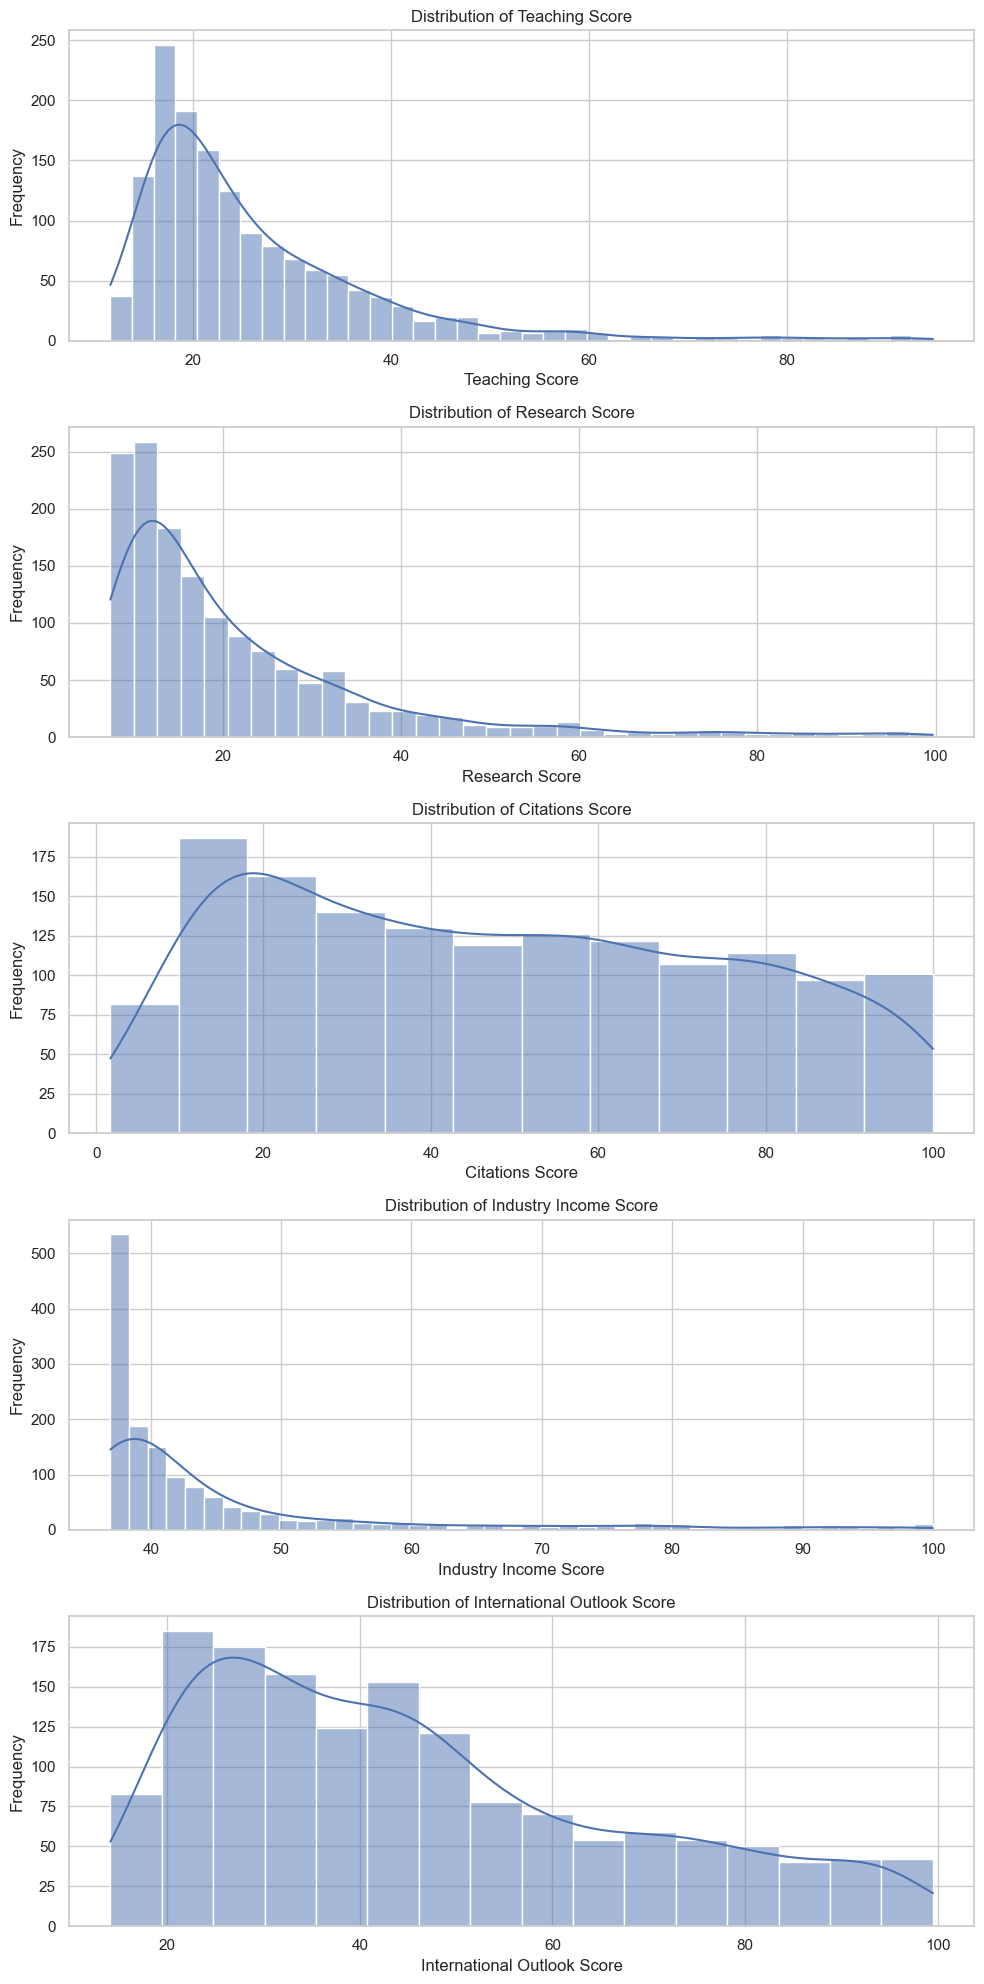

In [11]:
sns.set(style="whitegrid")
numerical_cols = ['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.histplot(df_new[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Teaching Score:

The histogram shows a right-skewed distribution, showing that most universities have lower teaching scores, with fewer institutions achieving very high teaching scores. 

Distribution of Research Score:

Similar to the teaching score, the research score distribution is also right-skewed. This suggests that while most universities have moderate research scores, a small number of institutions score very highly in research performance.

Distribution of Citations Score:

The citations score distribution still shows a slight right skew. This could indicate that while citations performance is more evenly distributed among universities, there remains a tail of institutions with very high citation scores.

Distribution of Industry Income Score:

This histogram is extremely right-skewed, with a large number of universities grouped at the lower end of industry income scores. It indicates that high industry income scores are very rare among universities.

Distribution of International Outlook Score:

The distribution of international outlook scores is less skewed than the other histograms but still shows a tendency towards the right, with most universities having a score below the midpoint of the scale.




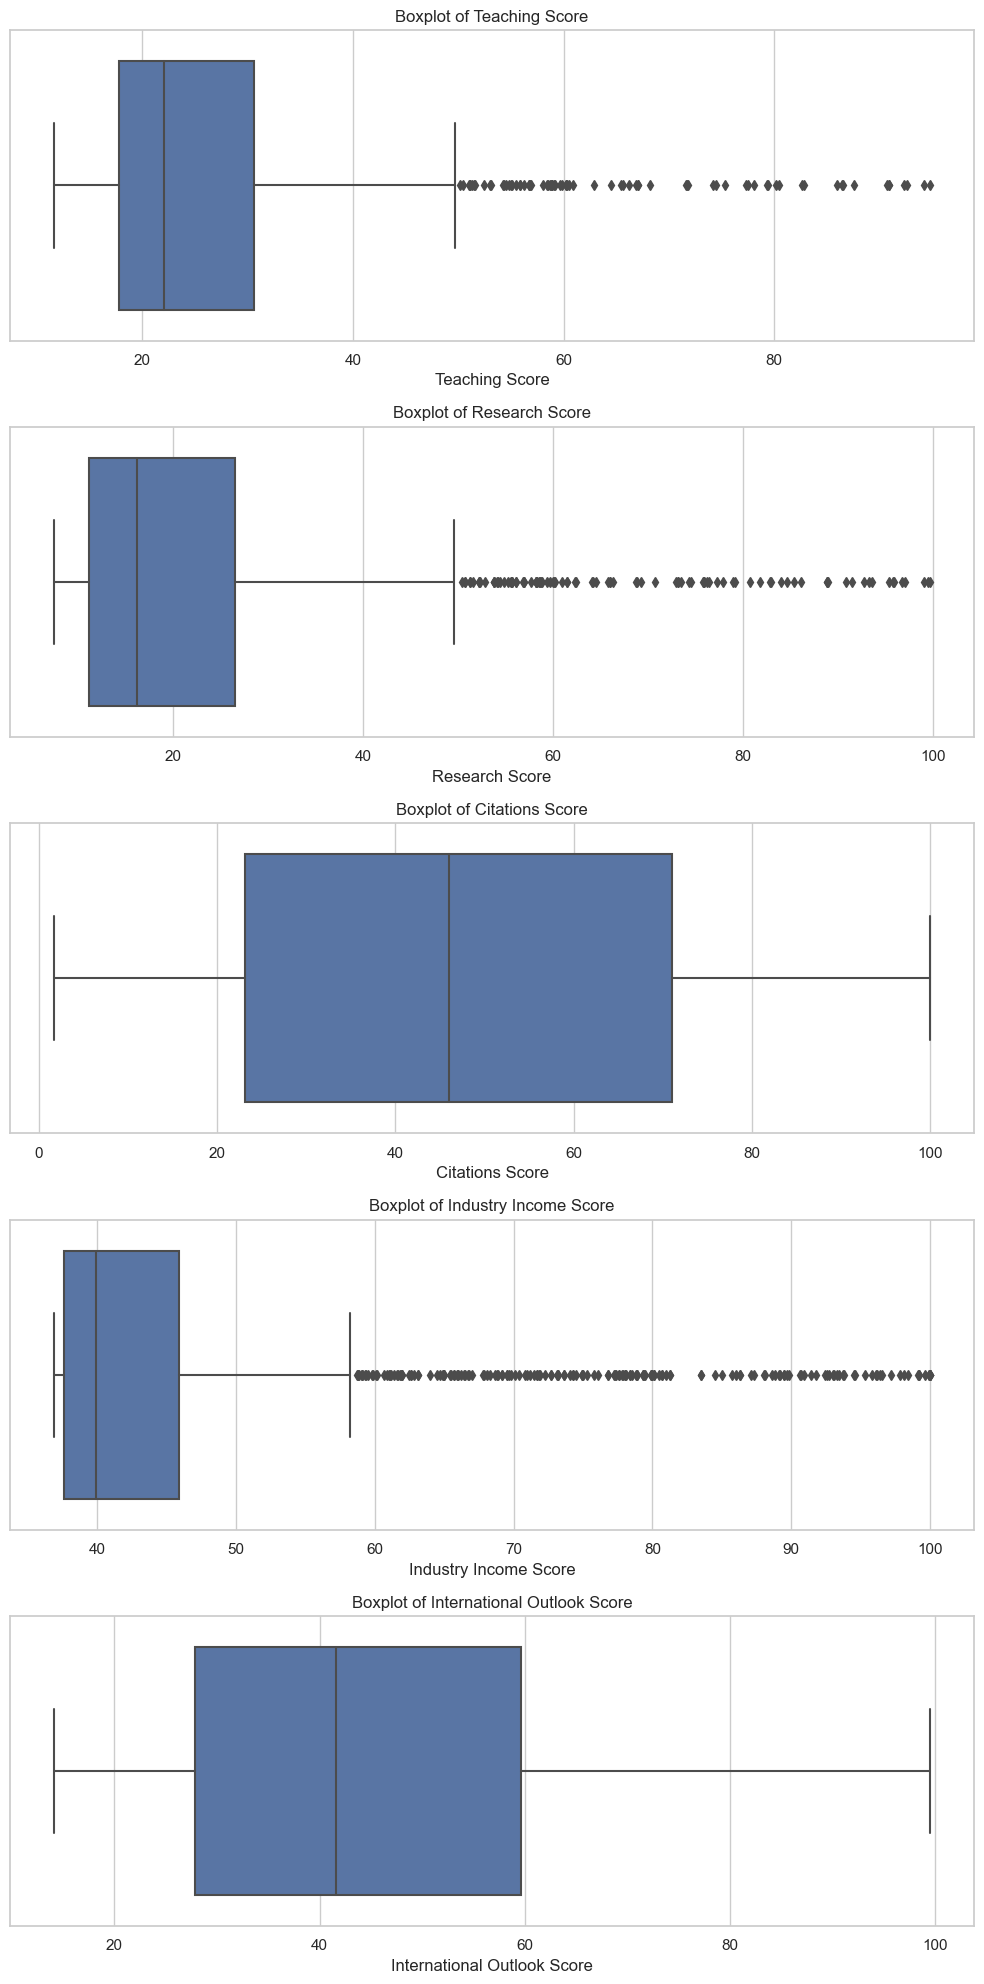

In [12]:
sns.set(style="whitegrid")
numerical_cols = ['Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_new[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Boxplot of Teaching Score:

The central box represents the interquartile range (IQR), where the middle 50% of scores lie, with the median score indicated by the line inside the box.
This suggests that universities with teaching scores that are unusually low or high compared to the rest of the dataset.

Boxplot of Research Score:

The IQR for Research Score is relatively narrow, indicating less variability in the middle 50% of universities.
The median is closer to the top of the box, indicating a skew towards lower scores for the majority of universities.

Boxplot of Citations Score:

The Citations Score has a wide IQR, suggesting more variability in the scores.
There are outliers on both the low and high ends, which shows that some universities have citation scores that are significantly different from the majority.

Boxplot of Industry Income Score:

This boxplot shows a large number of high outliers, which indicates that while most universities have a lower industry income score, there are several universities with exceptionally high scores.
Since the median is towards the lower end of the IQR, it reflects that more universities are grouped towards lower industry income scores.

Boxplot of International Outlook Score:

The IQR is quite broad, suggesting a decent spread in the international outlook scores among universities.
Fewer outliers are present compared to other scores, indicating more uniformity in how universities score for international outlook.

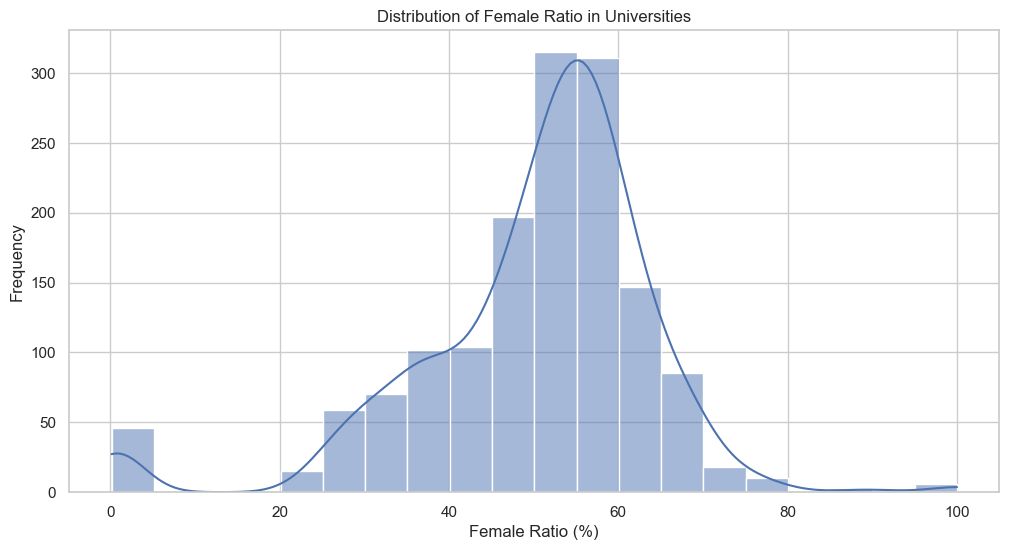

In [13]:
df_new['Female Ratio'] = df_new['Female:Male Ratio'].apply(lambda x: float(x.split(':')[0]) if x != 'Unknown' else None)

plt.figure(figsize=(12, 6))
sns.histplot(df_new['Female Ratio'], bins=20, kde=True)
plt.title('Distribution of Female Ratio in Universities')
plt.xlabel('Female Ratio (%)')
plt.ylabel('Frequency')
plt.show()


 The peak of the histogram, which occurs at the same time with the peak of the KDE, suggests that the most common female ratio among universities lies around 50-60%. This indicates that on average, there is a relatively balanced gender distribution in the sampled universities.
    
 The distribution appears to be slightly left-skewed, as there is a longer tail on the left side of the graph. This suggests that there are fewer universities with a significantly lower proportion of female students compared to those with a balanced or higher proportion of female students.
 
 There are a few universities (represented by individual bars on the far left of the histogram) with a very low female ratio, indicating a much higher number of male students to female students. These are relatively rare compared to the rest of the dataset.
  
 The histogram shows a wide spread in the female ratio, indicating diversity in gender balance across universities. However, the majority of universities cluster around the median, which again seems to be around the balanced mark.


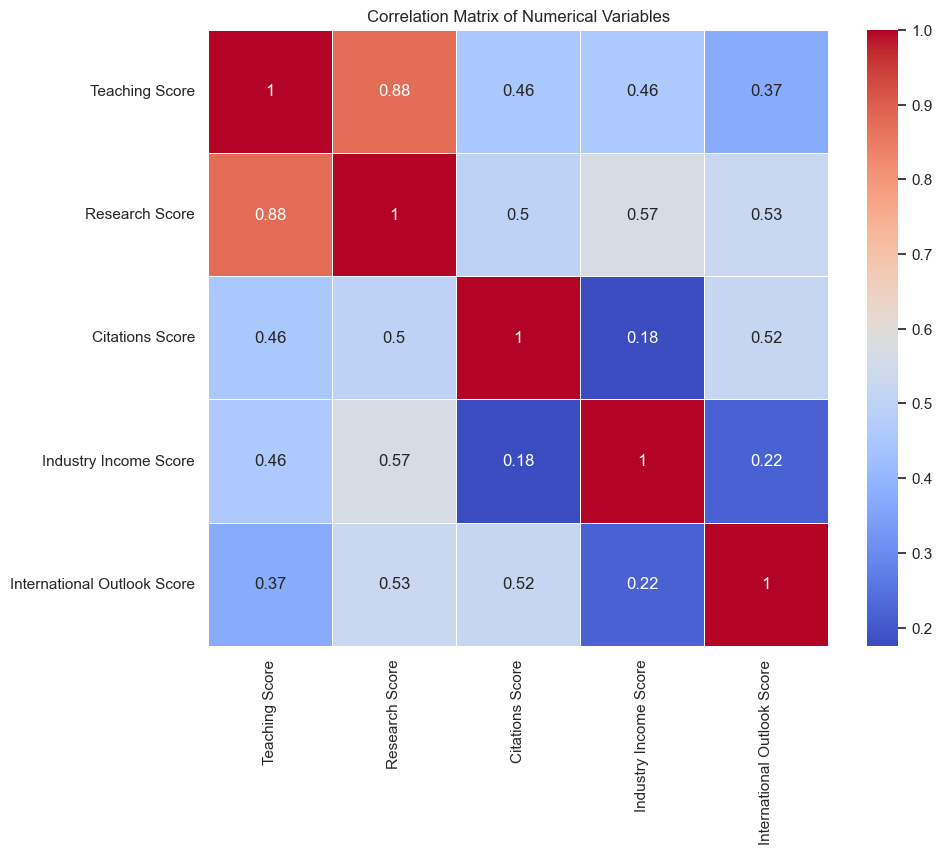

In [14]:
correlation_matrix = df_new[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Teaching Score and Research Score (0.88):

This high positive correlation suggests that universities with higher teaching scores tend to also have higher research scores. It indicates that the quality of teaching and research outputs are closely related, which could be because institutions that invest in quality faculty and teaching resources are likely to also support strong research activities.
Teaching Score and Citations Score (0.46):

A moderate positive correlation here implies that universities with better teaching metrics might also have higher citation scores, although the relationship is not as strong as with research scores. This may reflect a scenario where good teaching potentially fosters higher research quality, leading to more citations.
Teaching Score and Industry Income Score (0.46):

This moderate correlation indicates that institutions with higher teaching scores may also have better industry income scores. This could suggest that high-quality teaching institutions are also attractive to industry partners, leading to more collaboration and funding.
Teaching Score and International Outlook Score (0.37):

A positive correlation, though less strong, suggests that universities with high teaching scores may have a more international outlook. This could be because prestigious teaching institutions attract students and faculty from around the world.
Research Score and Citations Score (0.50):

A moderate positive correlation indicates that universities with robust research programs tend to have higher citation scores, which is expected since more research output can lead to more citations.
Research Score and Industry Income Score (0.57):

A moderate-to-strong positive correlation suggests that higher research scores are associated with higher industry income. This likely reflects the fact that strong research capabilities attract industry funding and partnerships.
Research Score and International Outlook Score (0.53):

This correlation suggests a moderate association where universities with a strong research presence also maintain a significant international outlook, potentially due to the global nature of academic research collaboration.
Citations Score and Industry Income Score (0.18):

A low positive correlation indicates a weaker relationship between citation impact and industry income. This might imply that citation performance does not directly translate to industry collaboration or funding.
Citations Score and International Outlook Score (0.52):

A moderate positive correlation suggests that universities with higher citations scores also have a broader international outlook, which could be due to the wide dissemination and recognition of their research work.
Industry Income Score and International Outlook Score (0.22):

A weak positive correlation suggests that there is some relationship between the ability to attract industry funding and international presence, but it is not as pronounced.

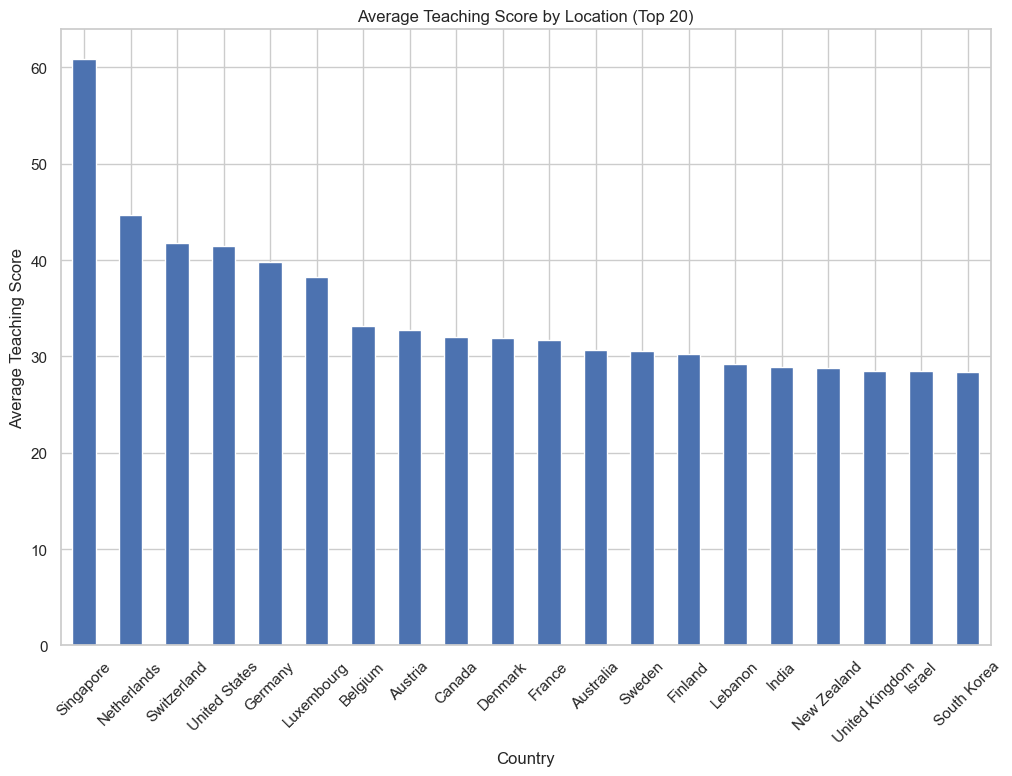

In [15]:
# Grouping the data by 'Location' and calculating the mean of 'Teaching Score'
location_teaching_mean = df_new.groupby('Country')['Teaching Score'].mean().sort_values(ascending=False).head(20)

# Plotting the average teaching scores for the top 20 locations
plt.figure(figsize=(12, 8))
location_teaching_mean.plot(kind='bar')
plt.title('Average Teaching Score by Location (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Teaching Score')
plt.xticks(rotation=45)
plt.show()


In [16]:
merged_df = pd.merge(df_new, gdp_2023, on='Country')
merged_df

,University Rank,Name of University,Country,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,2023
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48:52:00,96.40,92.3,99.7,99.0,74.9,96.2,48.0,48912.776
1,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00,94.80,90.9,99.5,97.0,54.2,95.8,47.0,48912.776
2,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60,90.40,82.8,90.8,98.3,59.8,97.5,40.0,48912.776
3,22,UCL,United Kingdom,"36,790",10.3,60%,59:41:00,85.70,74.5,85.4,97.9,44.5,96.7,59.0,48912.776
4,29,University of Edinburgh,United Kingdom,"32,845",11.8,47%,62:38:00,79.80,66.9,74.5,97.1,40.9,95.6,62.0,48912.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1201–1500,Sofia University,Bulgaria,"22,490",6.5,6%,65:35:00,21.35,25.0,11.1,16.4,37.8,39.0,65.0,16086.569
1310,1501+,Technical University of Sofia,Bulgaria,"10,339",11.6,9%,27 : 73,14.35,17.5,8.3,8.0,39.3,26.1,27.0,16086.569
1311,1501+,"University of the Andes, Venezuela",Venezuela,"24,372",11.7,2%,61:39:00,14.35,15.9,7.8,8.9,36.9,48.1,61.0,3474.332
1312,1501+,Baku State University,Azerbaijan,"23,323",13.3,2%,66:34:00,14.35,16.5,7.8,15.1,37.2,40.5,66.0,7529.695


In [17]:
groups = [group['OverAll Score'].dropna() for name, group in merged_df.groupby('2023')]


In [18]:
anova_result = stats.f_oneway(*groups)
print('ANOVA Test Result:', anova_result)


ANOVA Test Result: F_onewayResult(statistic=15.516440663346762, pvalue=3.831401445641575e-145)


This ANOVA result strongly suggests that the economic status of countries (as represented by their GDP) has a significant impact on university rankings.
Given the low p-value, the likelihood that this result is due to random chance is extremely low. Therefore, it's reasonable to conclude that variations in GDP are associated with variations in university rankings.


In [19]:
# Example: Categorizing 'Overall Score' into 'High', 'Medium', 'Low'
score_bins = [0, 33.3, 66.6, 100]
score_labels = ['Low', 'Medium', 'High']
df_new['Score Category'] = pd.cut(df_new['OverAll Score'], bins=score_bins, labels=score_labels)

# Creating a contingency table
contingency_table = pd.crosstab(df_new['Country'], df_new['Score Category'])

# Displaying the contingency table
print(contingency_table)


Score Category  Low  Medium  High
Country                          
Algeria          12       1     0
Argentina         3       0     0
Australia         1      19     4
Austria           1      10     0
Azerbaijan        1       0     0
...             ...     ...   ...
United States    42      96    28
Venezuela         1       0     0
Vietnam           4       1     0
Zambia            0       1     0
Zimbabwe          1       0     0

[99 rows x 3 columns]


In [20]:
from scipy.stats import chi2_contingency

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 838.9186927405572
P-value: 2.305203280102947e-80


The Chi-Square test result suggests that the distribution of universities' rankings is significantly associated with their respective countries. This means that the country a university is located in might influence its ranking, which could be due to various factors like economic status, educational infrastructure, or cultural aspects.


In [21]:
X = df_new[['Teaching Score', 'Research Score', 'Citations Score']]  # Predictor Variables
y = df_new['OverAll Score']  # Response Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.486912824055863
R-squared: 0.9842647624486744


In [22]:
from sklearn.cluster import KMeans
import pandas as pd

features = df_new[['Teaching Score', 'Research Score', 'International Outlook Score']]

kmeans = KMeans(n_clusters=3, random_state=0)  # Example with 3 clusters
clusters = kmeans.fit_predict(features)

df_new['Cluster'] = clusters

cluster_centers = kmeans.cluster_centers_

print(df_new.head())

print("Cluster Centers:")
print(cluster_centers)


  University Rank                     Name of University         Country  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

  No of student  No of student per staff International Student  \
0        20,965                     10.6                   42%   
1        21,887                      9.6                   25%   
2        20,185                     11.3                   39%   
3        16,164                      7.1                   24%   
4        11,415                      8.2                   33%   

  Female:Male Ratio  OverAll Score  Teaching Score  Research Score  \
0          48:52:00           96.4            92.3            99.7   
1     

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = StandardScaler().fit_transform(df_new[['Teaching Score', 'Research Score', 'Citations Score']])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

final_df = pd.concat([df_new, pca_df], axis=1)

print(final_df)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


     University Rank                     Name of University         Country  \
0                  1                   University of Oxford  United Kingdom   
1                  2                     Harvard University   United States   
2                  3                University of Cambridge  United Kingdom   
3                  3                    Stanford University   United States   
4                  5  Massachusetts Institute of Technology   United States   
...              ...                                    ...             ...   
1352             NaN                                    NaN             NaN   
1374             NaN                                    NaN             NaN   
1393             NaN                                    NaN             NaN   
1434             NaN                                    NaN             NaN   
1475             NaN                                    NaN             NaN   

     No of student  No of student per staff Interna

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_new[['Teaching Score', 'Research Score', 'Citations Score']]  # Independent variables
y = df_new['OverAll Score']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_regressor = DecisionTreeRegressor(random_state=0)

ree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8.190777404921699
R-squared: 0.9610115844744507
